In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
try:
    df = pd.read_csv("data.csv", encoding="utf-8")
except UnicodeDecodeError:
    df = pd.read_csv("data.csv", encoding="latin1")

print("Dataset loaded successfully")
print("Available columns:")
print(df.columns)


Dataset loaded successfully
Available columns:
Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


/tmp/ipython-input-4216172437.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding="latin1")


In [4]:

no2_col = [col for col in df.columns if "NO2" in col.upper()][0]
print("Using NO2 column:", no2_col)

x = df[no2_col].dropna().values

r = 102316054
a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)

print("a_r =", a_r)
print("b_r =", b_r)

Using NO2 column: no2
a_r = 0.05
b_r = 1.5


In [5]:
z = x + a_r * np.sin(b_r * x)

In [6]:
print("Original NO2 Statistics")
print("Mean:", np.mean(x))
print("Variance:", np.var(x))

print("\nTransformed z Statistics")
print("Mean:", np.mean(z))
print("Variance:", np.var(z))

Original NO2 Statistics
Mean: 25.809622897811263
Variance: 342.36339017375917

Transformed z Statistics
Mean: 25.811311026855478
Variance: 342.2989142894368


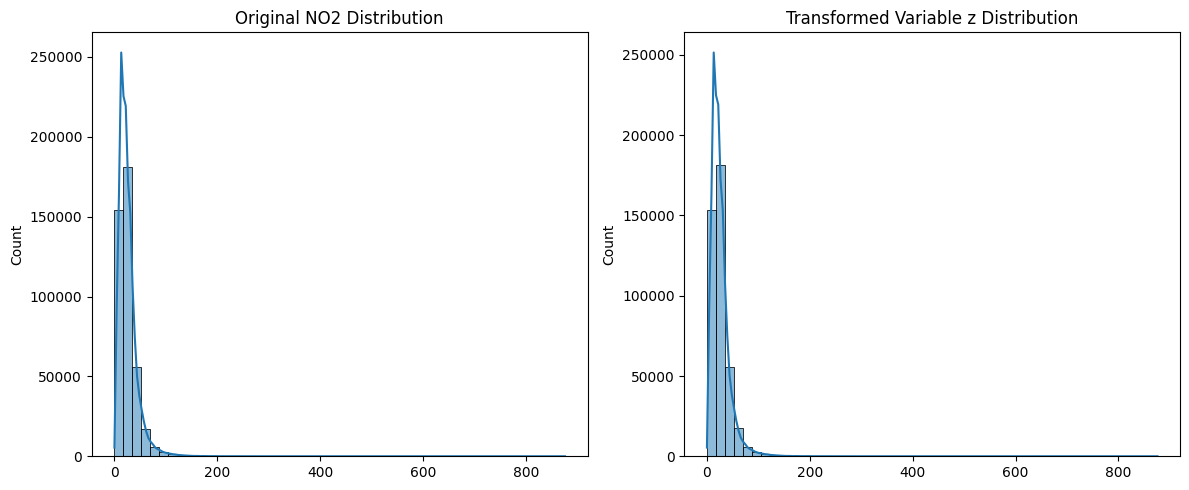

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(x, bins=50, kde=True)
plt.title("Original NO2 Distribution")

plt.subplot(1, 2, 2)
sns.histplot(z, bins=50, kde=True)
plt.title("Transformed Variable z Distribution")

plt.tight_layout()
plt.show()


In [8]:
mu_hat = np.mean(z)
variance_hat = np.mean((z - mu_hat) ** 2)
lambda_hat = 1 / (2 * variance_hat)
norm_const = np.sqrt(lambda_hat / np.pi)

print("Estimated Parameters:")
print("μ (mu) =", mu_hat)
print("λ (lambda) =", lambda_hat)
print("c =", norm_const)

Estimated Parameters:
μ (mu) = 25.811311026855478
λ (lambda) = 0.001460711615279084
c = 0.021562906761539043


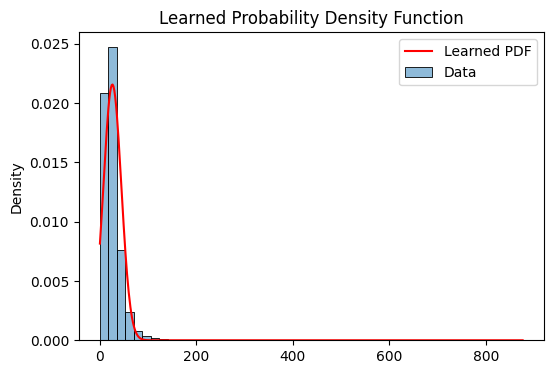

In [9]:
z_range = np.linspace(min(z), max(z), 500)
pdf = norm_const * np.exp(-lambda_hat * (z_range - mu_hat) ** 2)

plt.figure(figsize=(6, 4))
sns.histplot(z, bins=50, stat="density", alpha=0.5, label="Data")
plt.plot(z_range, pdf, 'r', label="Learned PDF")
plt.legend()
plt.title("Learned Probability Density Function")
plt.show()

In [10]:
z_alt = x + (a_r + 0.01) * np.sin(b_r * x)
print("Mean difference after small perturbation:",
      abs(np.mean(z) - np.mean(z_alt)))


Mean difference after small perturbation: 0.0003376258088323425
